In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path6 = '/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/ADNIMERGE.csv'
figures_path = './figures'

In [4]:
Data = pd.read_csv(data_path6)

<ipython-input-4-321da6f5fc1c>:1: DtypeWarning: Columns (18,19,20,103,104) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv(data_path6)


In [5]:
df=Data[["AGE","PTGENDER","PTEDUCAT", "PTMARRY","APOE4",
        "ADAS11","ADAS13","ADASQ4","MMSE","FAQ", "MOCA",
        "CDRSB","RAVLT_immediate","RAVLT_learning","RAVLT_forgetting",
        "RAVLT_perc_forgetting","LDELTOTAL", "TRABSCOR","mPACCdigit"
        ,"mPACCtrailsB","Ventricles", "Hippocampus","WholeBrain", "Entorhinal",
        "Fusiform", "MidTemp", "ICV","DX_bl"]]

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
LabelEncoder_1=LabelEncoder()
df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])

<ipython-input-7-84183a8d5250>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PTGENDER"]=LabelEncoder_1.fit_transform(df["PTGENDER"])


In [8]:
LabelEncoder_1=LabelEncoder()
df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])

<ipython-input-8-2db2d149a654>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["PTMARRY"]=LabelEncoder_1.fit_transform(df["PTMARRY"])


In [9]:
df=df.dropna()

In [10]:
df.drop(df[df['DX_bl']=="SMC"].index,inplace=True)


In [11]:
Labels = df['DX_bl'].values
Features = df.drop(['DX_bl'],axis=1).values


print('Features shape:', Features.shape)
print('Labels shape:', Labels.shape)

Features shape: (1846, 27)
Labels shape: (1846,)


In [12]:
for i in range(len(Labels)):
  if Labels[i]=="CN":
    Labels[i]=0
  if Labels[i]=="EMCI":
    Labels[i]=1
  if Labels[i]=="LMCI":
    Labels[i]=2
  if Labels[i]=="AD":
    Labels[i]=3


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Features, Labels, test_size=0.2, stratify=Labels, random_state=42)

print('Train data shape:', X_train.shape)
print('Train labels shape:', y_train.shape)
print('Test data shape:', X_test.shape)
print('Test labels shape:', y_test.shape)


Train data shape: (1476, 27)
Train labels shape: (1476,)
Test data shape: (370, 27)
Test labels shape: (370,)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
import numpy as np
X_train=np.expand_dims(X_train, axis=-1)
X_test=np.expand_dims(X_test, axis=-1)

In [16]:
shape=(X_train.shape[1],1)

In [17]:
X_test[0].shape

(27, 1)

In [18]:
cn=[]
lmci=[]
emci=[]
ad=[]
for i in range(len(y_test)):
  if y_test[i]==0:
    cn.append(i)
  if y_test[i]==1:
    emci.append(i)
  if y_test[i]==2:
    lmci.append(i)
  if y_test[i]==3:
    ad.append(i)

In [19]:
print("control",cn)
print("emci",emci)
print("lmci",lmci)
print("ad",ad)

control [0, 1, 8, 9, 11, 19, 20, 22, 24, 26, 31, 32, 39, 40, 43, 52, 53, 61, 63, 64, 66, 68, 70, 71, 72, 73, 75, 78, 79, 81, 83, 84, 95, 96, 98, 99, 100, 103, 106, 107, 108, 109, 110, 115, 125, 129, 131, 132, 135, 143, 144, 147, 148, 152, 159, 160, 161, 173, 175, 176, 177, 181, 183, 186, 189, 201, 204, 205, 206, 211, 215, 216, 219, 222, 225, 226, 227, 231, 235, 251, 258, 261, 262, 263, 264, 265, 275, 276, 280, 282, 284, 291, 293, 296, 299, 302, 306, 310, 311, 314, 316, 317, 323, 324, 327, 330, 336, 341, 342, 343, 346, 347, 350, 353, 361, 364, 366]
emci [5, 6, 10, 14, 16, 17, 21, 25, 28, 29, 30, 33, 34, 45, 46, 47, 48, 50, 54, 55, 56, 58, 59, 62, 67, 69, 74, 76, 77, 82, 87, 91, 92, 94, 97, 112, 113, 114, 118, 121, 123, 124, 127, 130, 133, 134, 136, 138, 139, 140, 142, 146, 150, 151, 153, 155, 157, 158, 165, 166, 167, 168, 169, 170, 171, 178, 179, 180, 182, 185, 187, 194, 195, 200, 202, 203, 207, 209, 210, 213, 218, 221, 228, 230, 232, 233, 236, 237, 238, 239, 240, 241, 242, 243, 245, 24

In [20]:
X_testAD=np.expand_dims(X_test[13], axis=0)

In [21]:
X_testEMCI=np.expand_dims(X_test[5], axis=0)

In [22]:
X_testLMCI=np.expand_dims(X_test[2], axis=0)

In [23]:
X_testCN=np.expand_dims(X_test[0], axis=0)

In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/modelo.h5') # tu modelo preentrenado


In [25]:
def gradcam(capa,x,clase):
  import numpy as np
  import tensorflow as tf

  last_conv_layer = model.get_layer(capa)
  input=x
  # Pasada hacia adelante para obtener la predicción
  predictions = model(input)
  predicted_class = np.argmax(predictions)


  from tensorflow.keras.models import Model


  #Obtener gradientes
  with tf.GradientTape() as tape:
      last_conv_layer = model.get_layer(capa)
      intermediate_model = Model(inputs=model.input, outputs=[last_conv_layer.output,model.output])
      conv_output, predictions = intermediate_model(input)
      loss = predictions[:, predicted_class]

  grads = tape.gradient(loss, conv_output)


  # Calcula alpha_k correctamente
  alpha_k = tf.reduce_mean(grads, axis=(1, 2))

  # Verifica la forma de alpha_k


  # Calcula Grad-CAM
  gradcam = tf.nn.relu(tf.reduce_sum(tf.multiply(conv_output, alpha_k), axis=-1))

  # Verifica la forma de gradcam

  # Visualizar

  plt.plot(input[0],color='black')
  plt.imshow(gradcam, alpha=0.4, cmap='jet',extent=[0, 26, np.min(input[0])-1, np.max(input[0])+1])
  # Oculta las etiquetas en el eje x
  plt.yticks([])
  plt.savefig("/content/drive/MyDrive/AlzheimerCodesDatosPlanos/ADNI/imagenes/"+clase+capa+".jpg")
  plt.show()

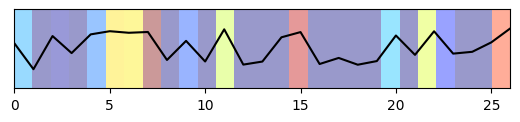

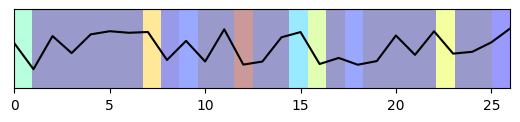

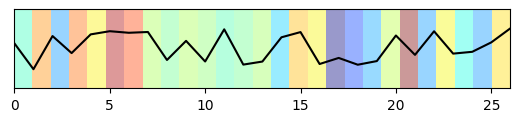

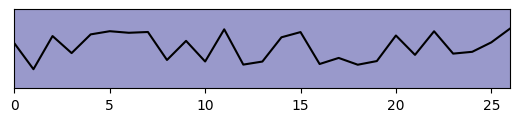

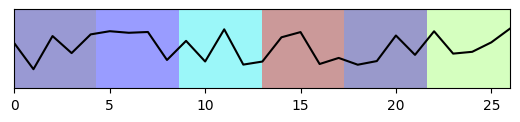

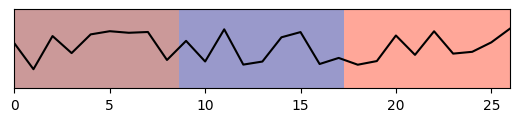

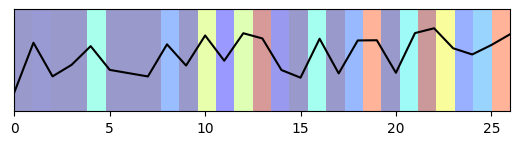

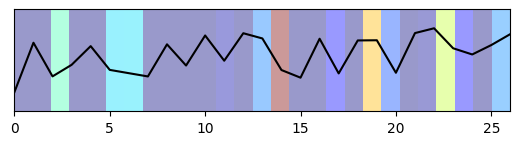

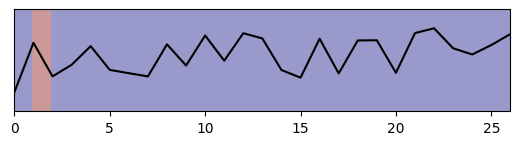

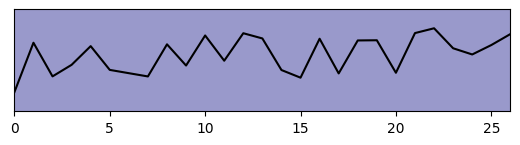

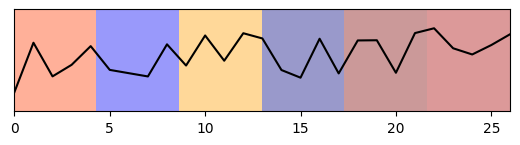

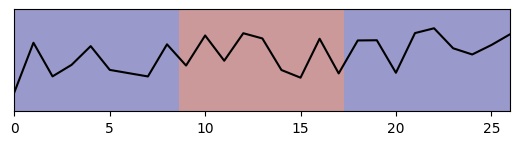

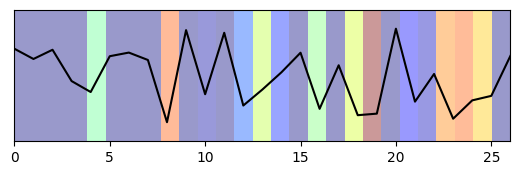

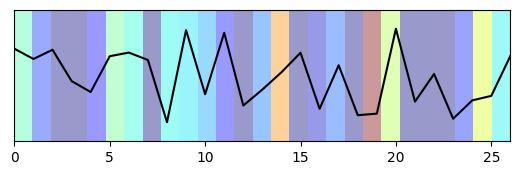

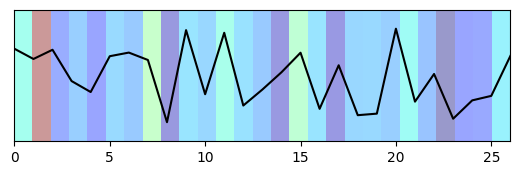

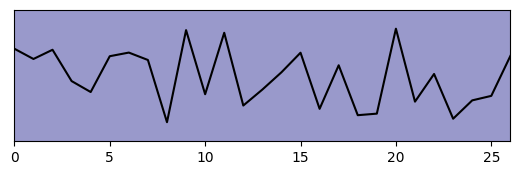

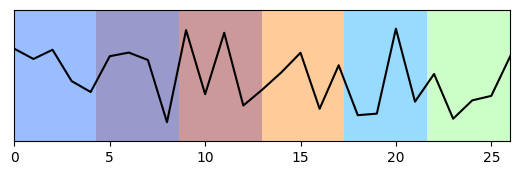

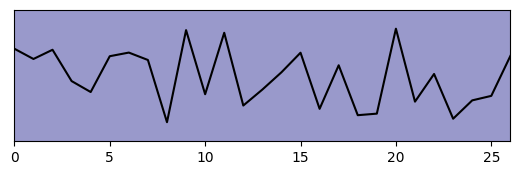

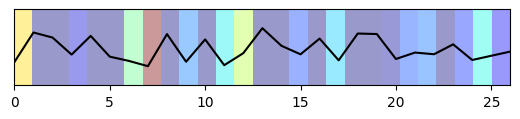

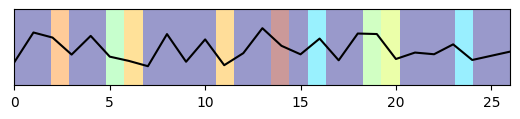

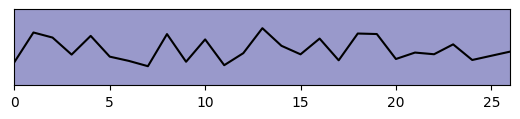

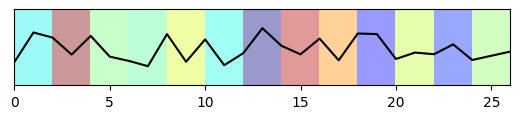

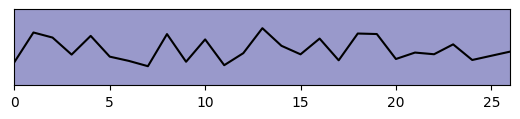

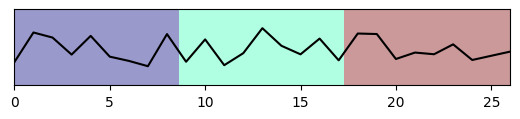

In [26]:
for i in range(6):
  capa="conv"+str(i+1)
  x=X_testAD
  clase="AD"
  gradcam(capa,x,clase)

for i in range(6):
  capa="conv"+str(i+1)
  x=X_testEMCI
  clase="emci"
  gradcam(capa,x,clase)

for i in range(6):
  capa="conv"+str(i+1)
  x=X_testLMCI
  clase="lmci"
  gradcam(capa,x,clase)

for i in range(6):
  capa="conv"+str(i+1)
  x=X_testCN
  clase="cn"
  gradcam(capa,x,clase)

In [31]:
model1 = tf.keras.models.load_model('/content/drive/MyDrive/AlzheimerCodesDatosPlanos/BasesDeDatos/ADNI/modelotf.h5') # tu modelo preentrenado


In [32]:
def compute_gradcam(model, input_signal, layer_name="multi_head_attention"):
    # Obteniendo los outputs y los pesos de la capa de atención
    with tf.GradientTape() as tape:
        tape.watch(input_signal)
        attention_layer = model.get_layer(layer_name)
        intermediary_model = tf.keras.models.Model([model.inputs], [model.output, attention_layer.output])
        predictions, attention_outputs = intermediary_model(input_signal)
        target = predictions[:, tf.argmax(predictions[0])]

    # Calculando los gradientes
    grads = tape.gradient(target, attention_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))
    heatmap = tf.reduce_mean(tf.multiply(pooled_grads, attention_outputs), axis=-1)

    # Normalizando el heatmap entre 0 y 1 para visualización
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

    return heatmap

input_signal_data = X_testAD  # Tu data aquí
heatmap = compute_gradcam(model1, input_signal_data)

ValueError: ignored